In [13]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [14]:
df=pd.read_csv(r"C:\Users\palak\Downloads\Sales Dataset.csv")
df

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
...,...,...,...,...,...,...,...,...,...,...,...,...
1189,B-26370,8825,3594,15,Furniture,Tables,Debit Card,2024-07-31,Megan Mclean,New York,New York City,2024-07
1190,B-26298,2082,642,8,Electronics,Phones,EMI,2020-06-02,Caitlin Hunt,New York,Rochester,2020-06
1191,B-26298,2082,642,8,Electronics,Phones,EMI,2022-12-15,Jenna Holland,Texas,Austin,2022-12
1192,B-26298,2082,642,8,Electronics,Phones,EMI,2020-08-07,Stephanie Oconnell,New York,Buffalo,2020-08


conn=sqlite3.connect("sales_data.db")
df.to_sql("Sales_Data",conn,if_exists="replace",index=False)

FIND THE TOTAL SALES ON THE BASIS OF CATEGORY

query1= """ 
Select `order Id`,CustomerName,category,sum(quantity) as "total_Qty",sum(amount) as "Revenue" from Sales_Data group by Category
"""
print(pd.read_sql_query(query1,conn))


TOP 5 CUSTOMER BY SALES 

query2= """ SELECT CustomerName, SUM(Amount) AS "Total_Sales"
FROM Sales_Data
GROUP BY CustomerName
ORDER BY Total_Sales DESC
LIMIT 5;
"""
print(pd.read_sql_query(query2,conn))

HIGHEST PROFIT ORDER 

In [26]:
query3= """ SELECT `Order ID`, CustomerName, Amount, Profit, Category
FROM Sales_Data
ORDER BY Profit DESC
LIMIT 1 """

print(pd.read_sql_query(query3,conn))

  Order ID    CustomerName  Amount  Profit     Category
0  B-26357  Brandi Vasquez    9879    4930  Electronics


AVERAGE ORDER VALUE

In [32]:
query4=""" SELECT AVG(Amount) AS Avg_Order_Value
FROM Sales_data"""
print(pd.read_sql_query(query4,conn))

   Avg_Order_Value
0      5178.089615


SALES BY PAYMENT MODE

In [34]:
query5="""  SELECT PaymentMode, COUNT(*) AS Number_of_Orders, SUM(Amount) AS Total_Sales
FROM Sales_data
GROUP BY PaymentMode """
print(pd.read_sql_query(query5,conn))

   PaymentMode  Number_of_Orders  Total_Sales
0          COD               206      1141790
1  Credit Card               258      1281044
2   Debit Card               260      1395035
3          EMI               218      1114297
4          UPI               252      1250473


GRAPH OF REVENUE BY PRODUCT

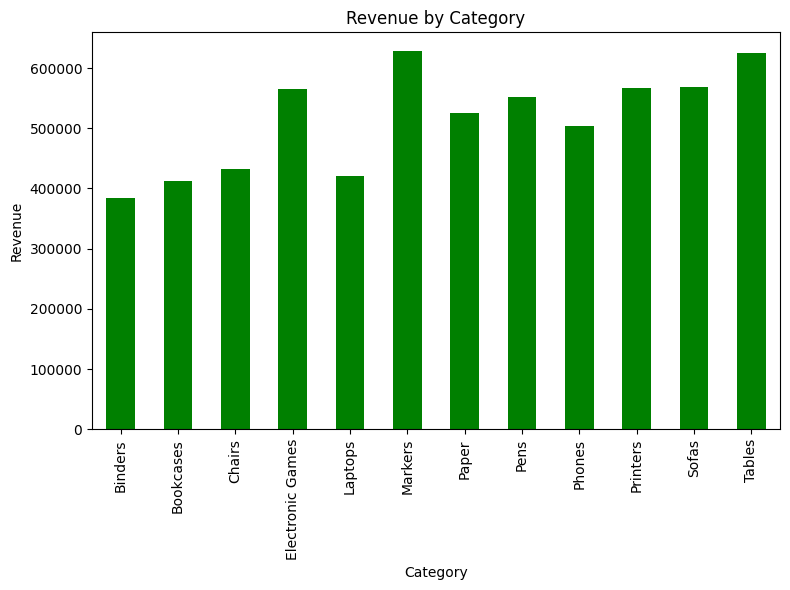

<Figure size 640x480 with 0 Axes>

In [51]:
Sales_by_category=df.groupby("Sub-Category")["Amount"].sum().reset_index()
Sales_by_category.rename(columns={"Sub-Category":"sub-category","Amount":"revenue"},inplace=True)
ax = Sales_by_category.plot(kind='bar', x='sub-category', y='revenue', figsize=(8,6), legend=False, color="green")
plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()
plt.savefig("sales_category_chart.png")